In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns                # For Visualization 
import matplotlib.pyplot as plt      # ploting package
%matplotlib inline
import warnings             # Filtering warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
#pd.read csv ('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

In [3]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
df.shape

(397, 6)

In [5]:
print('No of Rows:',df.shape[0])
print('No. of Columns:',df.shape[1])

No of Rows: 397
No. of Columns: 6


In [6]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [7]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.sample(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
24,AssocProf,A,13,8,Female,74830
228,Prof,A,16,11,Male,88175
47,Prof,B,23,19,Female,151768
349,Prof,B,27,28,Male,144309
29,Prof,B,12,8,Male,118223


In [10]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

# Statistical Analysis

In [11]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


# Checking Null Values :

In [12]:
False == 0

True

In [13]:
True == 1

True

In [14]:
# checking Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [15]:
df.isnull()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
392,False,False,False,False,False,False
393,False,False,False,False,False,False
394,False,False,False,False,False,False
395,False,False,False,False,False,False


In [16]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [17]:
df.isnull().sum().sum()

0

<AxesSubplot:>

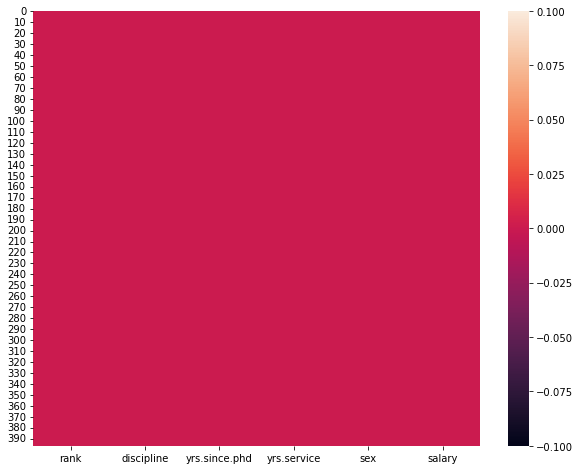

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

As we can see from the heatmap, there is no missing value in the dataset

# new dataframe

In [19]:
df1=df[df.columns[2:]]
df1

,yrs.since.phd,yrs.service,sex,salary
0,19,18,Male,139750
1,20,16,Male,173200
2,4,3,Male,79750
3,45,39,Male,115000
4,40,41,Male,141500
...,...,...,...,...
392,33,30,Male,103106
393,31,19,Male,150564
394,42,25,Male,101738
395,25,15,Male,95329


# EDA

# -Correlation

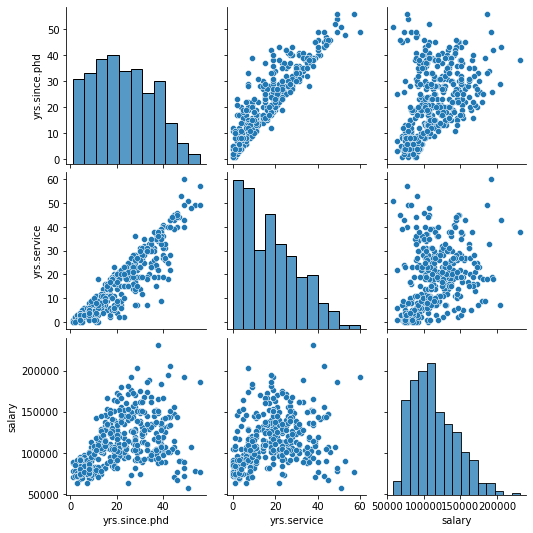

In [20]:
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.savefig('pairplot.png')
plt.show()

In [21]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [22]:
df.corr()['salary'].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

# Correlation using heatmap 

<AxesSubplot:>

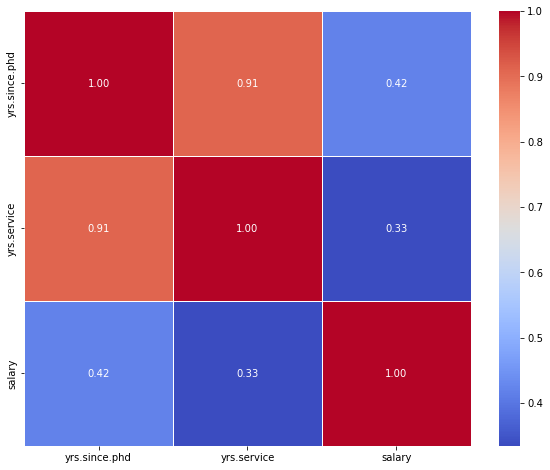

In [23]:
import matplotlib.pyplot as plt
#size of canvas
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='white',fmt='.2f',cmap='coolwarm')

# Normal Distribution Curve

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

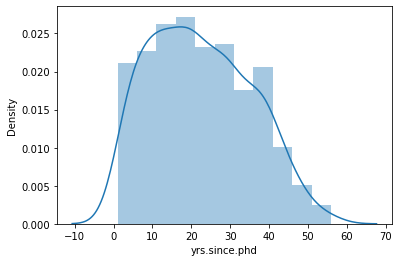

In [24]:
sns.distplot(df['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

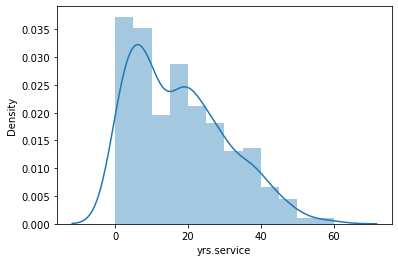

In [25]:
sns.distplot(df['yrs.service'])

<AxesSubplot:xlabel='salary', ylabel='Density'>

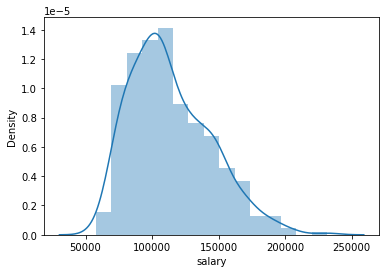

In [26]:
sns.distplot(df['salary'])

# Histplot

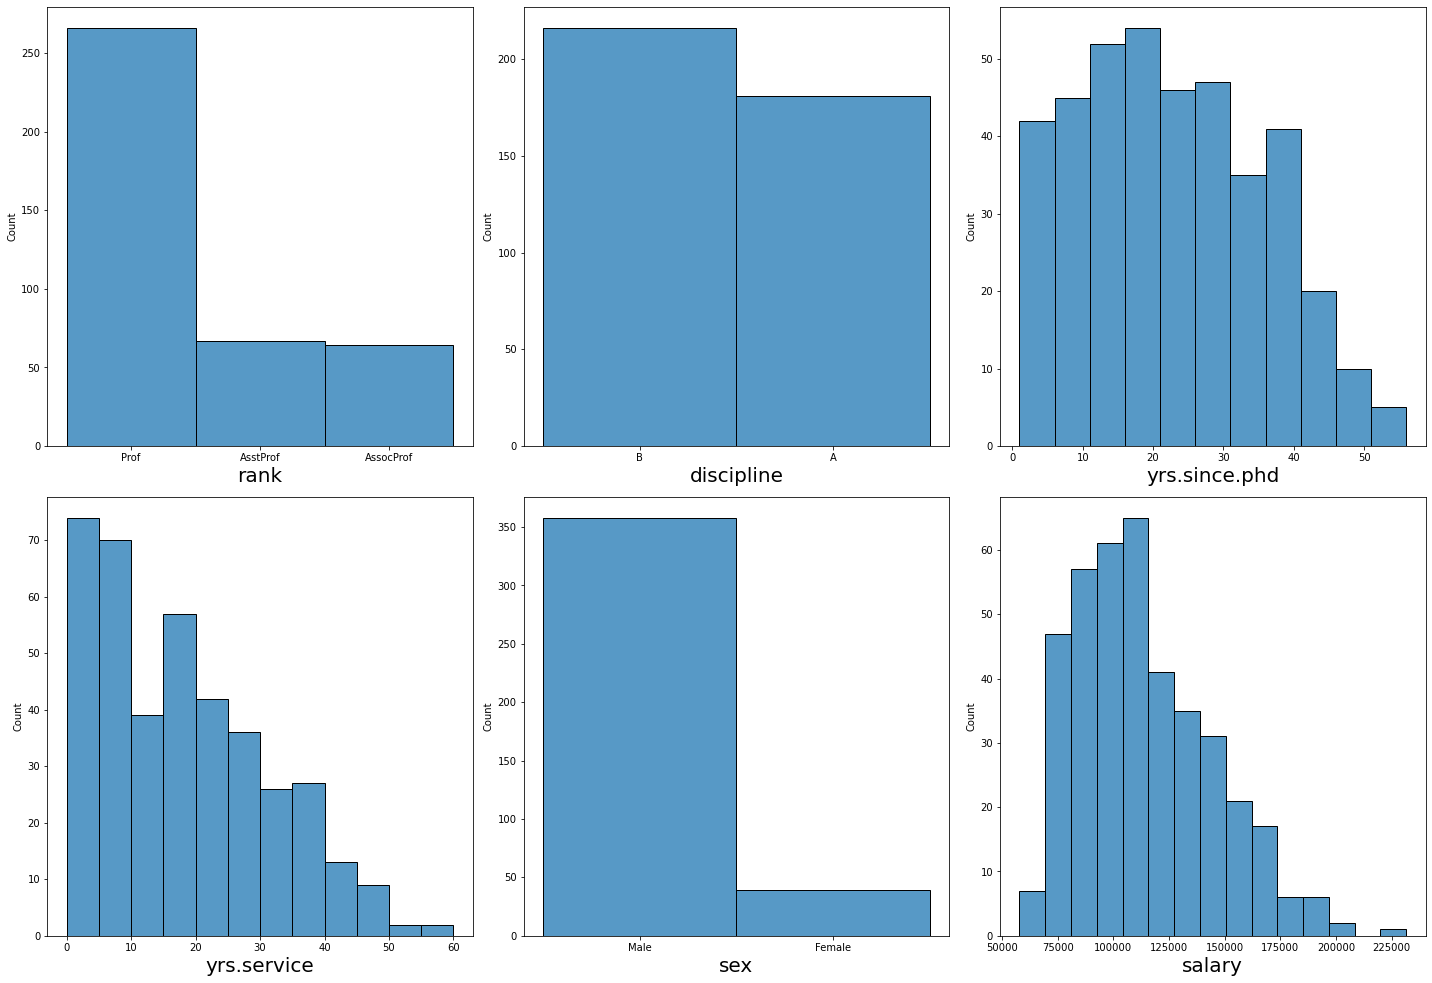

In [27]:
plt.figure(figsize=(20,20), facecolor='white')
pn =1
for column in df:
    if pn <=9:
        ax = plt.subplot(3,3,pn)
        sns.histplot(df[column], palette='Rainbow' )
        plt.xlabel(column,fontsize=20)
    pn+=1
plt.tight_layout()
plt.show()

# Pairplot

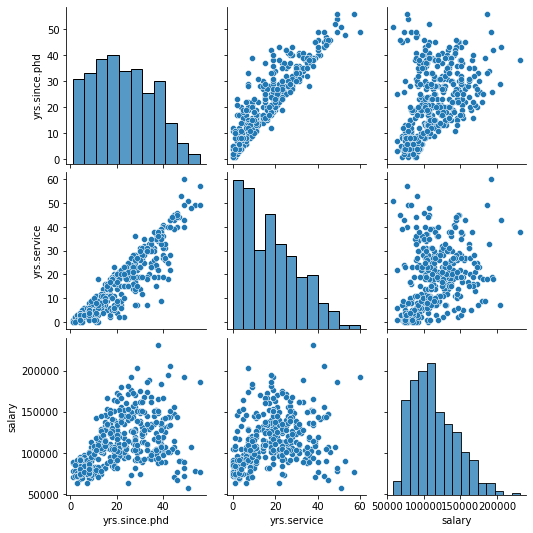

In [28]:
sns.pairplot(df , palette='viridis')

In [29]:
df.salary.value_counts()

92000     5
72500     4
74000     4
105000    3
101000    3
         ..
76840     1
83001     1
113278    1
155500    1
81035     1
Name: salary, Length: 371, dtype: int64

In [30]:
X = df.drop('salary',axis=1)
X.shape
y = df['salary']
y.shape

(397,)

# Machine Learning Algorithm

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [32]:
x=df1.drop(columns =['yrs.since.phd'])
y=df1['yrs.since.phd']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33, random_state=43)
print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (265, 3)
Training target vector size: (265,)
Test feature matrix size: (132, 3)
Test target vector size: (132,)
